In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"debrinaazzahra","key":"63e627fd7f0ad61895c88fc1595d9b07"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 34.1MB/s]


In [4]:
!mkdir diabetes-prediction-dataset
!unzip diabetes-prediction-dataset.zip -d diabetes-prediction-dataset
!ls diabetes-prediction-dataset

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes-prediction-dataset/diabetes_prediction_dataset.csv  
diabetes_prediction_dataset.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

In [6]:
df = pd.read_csv('/content/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype== 'int64' :
      numerical.append(col)
    else:
      catgcols.append(col)

for col in df.columns:
    if col in numerical:
      df[col].fillna(df[col].median(), inplace=True)
    else:
      df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [12]:
df_duplicated = df[df.duplicated()]
df_duplicated.shape[0]

3854

In [13]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,101,0,1,4,1334,11,140,0
1,0,75,0,0,0,1547,11,80,0
2,1,49,0,0,4,1547,5,158,0
3,0,57,0,0,1,1160,4,155,0
4,1,97,1,1,1,829,3,155,0


In [14]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [15]:
X = df.drop(labels=['diabetes'], axis=1).values
y = df['diabetes']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (80000, 8)
test shape: (20000, 8)


In [37]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=X.shape[-1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                288       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1906 (7.45 KB)
Trainable params: 1906 (7.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


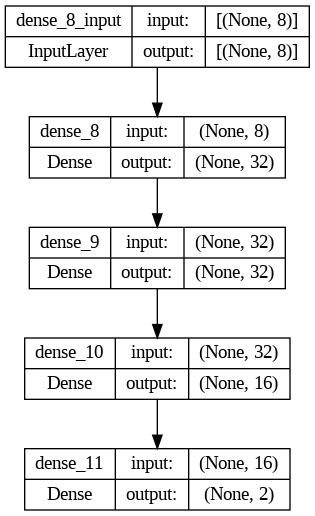

In [39]:
plot_model(model, show_shapes = True)

In [40]:
optim = Adam(lr=0.001)

model.compile(
    optimizer=optim,
    loss='sparse_categorical_crossentropy',
    metrics=['Accuracy']
    )

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 7s 3ms/step - loss: 1.1244 - Accuracy: 0.8618 - val_loss: 0.2600 - val_Accuracy: 0.9197
Epoch 2/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.4056 - Accuracy: 0.8954 - val_loss: 0.2234 - val_Accuracy: 0.9323
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3241 - Accuracy: 0.9099 - val_loss: 0.4796 - val_Accuracy: 0.9183
Epoch 4/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2845 - Accuracy: 0.9192 - val_loss: 0.1616 - val_Accuracy: 0.9417
Epoch 5/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.2330 - Accuracy: 0.9282 - val_loss: 0.1739 - val_Accuracy: 0.9469
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.2049 - Accuracy: 0.9341 - val_loss: 0.2001 - val_Accuracy: 0.9337
Epoch 7/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.1886 - Accuracy: 0.9378 - val_loss: 0.2696 - val_Accuracy:

In [41]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(x_test), axis=1)
print(accuracy_score(y_test, pred))

625/625 [==============================] - 1s 1ms/step
0.9482


In [42]:
model.evaluate(x_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.1505 - Accuracy: 0.9482


[0.15051226317882538, 0.948199987411499]

In [43]:
df.head(30)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,101,0,1,4,1334,11,140,0
1,0,75,0,0,0,1547,11,80,0
2,1,49,0,0,4,1547,5,158,0
3,0,57,0,0,1,1160,4,155,0
4,1,97,1,1,1,829,3,155,0
5,0,41,0,0,4,1547,11,85,0
6,0,65,0,0,4,746,10,200,1
7,0,100,0,0,0,1201,5,85,0
8,1,63,0,0,4,2179,3,145,0
9,0,53,0,0,4,1547,4,100,0


In [44]:
prediction = model.predict([[0,	101,	0,	1,	4,	1334,	11,	140]])
print(prediction)
#0

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class > 0.5:
  print("Pasien Menderita Diabetes")
else:
  print("Pasien Tidak Menderita Diabetes")

1/1 [==============================] - 0s 82ms/step
[[0.5568227 0.4431773]]
Pasien Tidak Menderita Diabetes


In [45]:
prediction = model.predict([[1,	88,	0,	1,	5,	1547,	10,	200]])
print(prediction)
#1

predicted_class = np.argmax(prediction, axis=-1)


if predicted_class > 0.5:
  print("Pasien Menderita Diabetes")
else:
  print("Pasien Tidak Menderita Diabetes")

1/1 [==============================] - 0s 39ms/step
[[0.11855495 0.881445  ]]
Pasien Menderita Diabetes


In [26]:
model.save('./diabetes.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
model = tf.keras.models.load_model('./diabetes.h5')
converter =tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./diabetes.tflite", "wb").write(tflite_model)

7152